# Section 4.1 — Simple linear regression

This notebook contains the code examples from [Section 4.1 Simple linear regression]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn"t work
from plot_helpers import RCPARAMS
RCPARAMS.update({"figure.figsize": (5, 3)})   # good for screen
# RCPARAMS.update({"figure.figsize": (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = "retina"

# Where to store figures
DESTDIR = "figures/lm/simple"

<Figure size 640x480 with 0 Axes>

In [3]:
from ministats.plots.figures import plot_residuals
from ministats.plots.figures import plot_residuals2

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
import warnings
# silence kurtosistest warning when using n < 20
warnings.filterwarnings("ignore", category=UserWarning)

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$

$$
\newcommand{\CI}[1]{\textbf{CI}_{#1}}
\newcommand{\CIL}[1]{\textbf{L}_{#1}}
\newcommand{\CIU}[1]{\textbf{U}_{#1}}
\newcommand{\ci}[1]{\textbf{ci}_{#1}}
\newcommand{\cil}[1]{\textbf{l}_{#1}}
\newcommand{\ciu}[1]{\textbf{u}_{#1}}
$$


(this cell contains the macro definitions like $\stderr{\overline{\mathbf{x}}}$, $\stderrhat{}$, $\Mean$, ...)

## Definitions

TODO: add definitions

## Linear model


![The regression line describes the expected value of the outcome variable Y at different values of x](./attachments/lm/linear_model_xy_with_gaussians.png)

## Example: students score as a function of effort

In [6]:
students = pd.read_csv("../datasets/students.csv")
students.head()

,student_ID,background,curriculum,effort,score
0,1,arts,debate,10.96,75.0
1,2,science,lecture,8.69,75.0
2,3,arts,debate,8.60,67.0
3,4,arts,lecture,7.92,70.3
4,5,science,debate,9.90,76.1


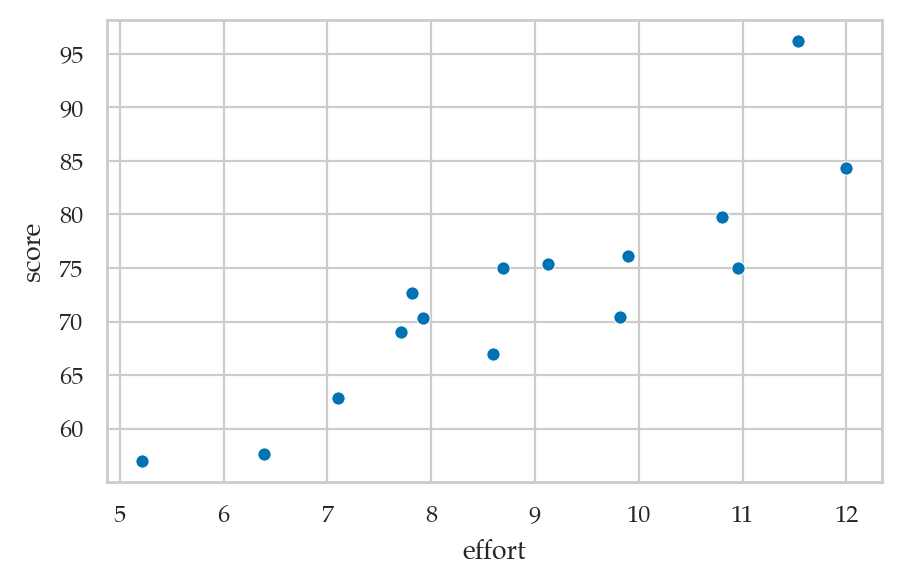

In [7]:
efforts = students["effort"]
scores = students["score"]
sns.scatterplot(x=efforts, y=scores);

#### Compute the correlation

In [8]:
np.corrcoef(efforts, scores)[0,1]
# ALT. students[["effort","score"]].corr()
# np.corrcoef

0.8794375135614695

## Parameter estimation using least squares

In [9]:
meaneffort = efforts.mean()
meanscore = scores.mean()
num = np.sum( (efforts-meaneffort)*(scores-meanscore) )
denom = np.sum( (efforts - meaneffort)**2 )
b1 = num / denom
b1

4.504850344209071

In [10]:
b0 = meanscore - b1*meaneffort
b0

32.46580930159963

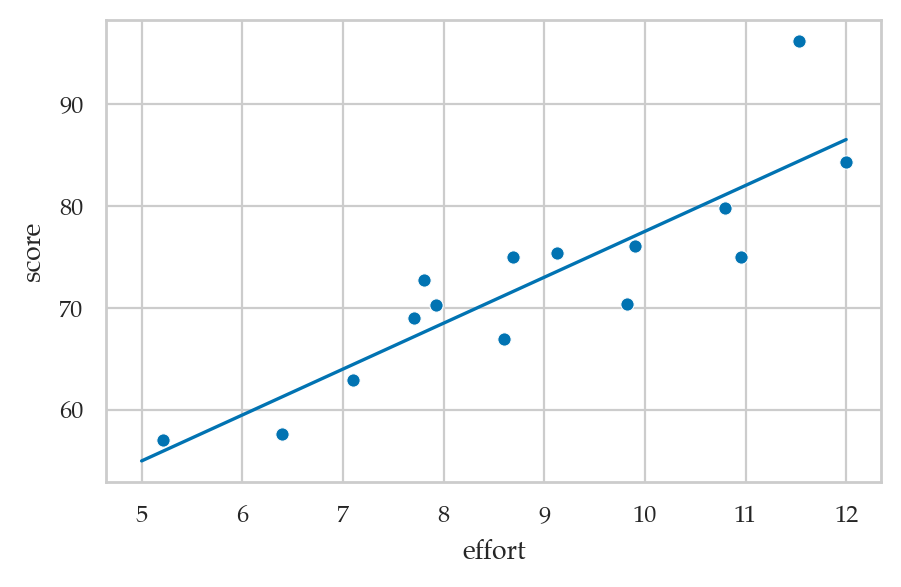

In [11]:
es = np.linspace(5, 12)
scorehats = b0 + b1*es
sns.lineplot(x=es, y=scorehats)
sns.scatterplot(x=efforts, y=scores);

In [12]:
# # ALT.
# sns.regplot(x=efforts, y=scores, ci=None);

### Least squares optimization for the parameters

How do we find the parameter estimates of the model?

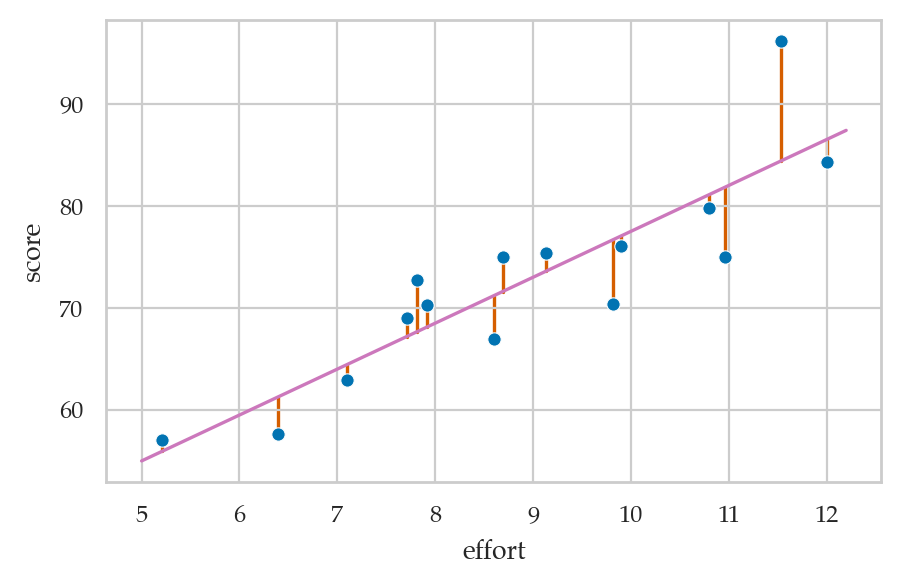

In [13]:
plot_residuals(efforts, scores, b0, b1)
sns.scatterplot(x=efforts, y=scores)
es = np.linspace(5, 12.2)
scorehats = b0 + b1*es
sns.lineplot(x=es, y=scorehats, color="C4");

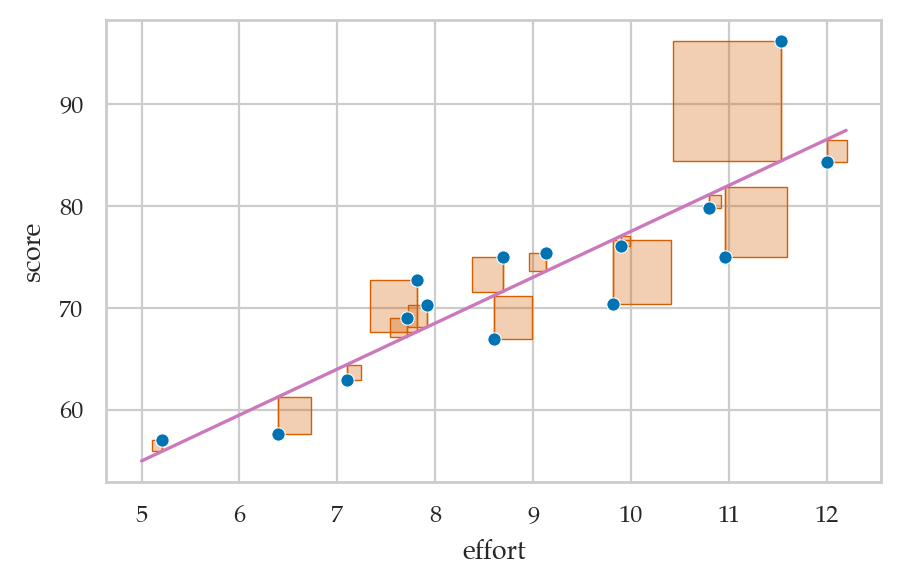

In [14]:
ax = sns.scatterplot(x=efforts, y=scores, zorder=4)
es = np.linspace(5, 12.2)
scorehats = b0 + b1*es
sns.lineplot(x=es, y=scorehats, color="C4", zorder=5)
plot_residuals2(efforts, scores, b0, b1, ax=ax);

### Estimating the standard deviation parameter

In [15]:
scorehats = b0 + b1*efforts
residuals = scores - scorehats
residuals[0:4]

0   -6.838969
1    3.387041
2   -4.207522
3    2.155776
dtype: float64

In [16]:
SSR = np.sum( residuals**2 )
n = len(students)
sigmahat = np.sqrt( SSR / (n-2) )
sigmahat

4.929598282660258

## Model diagnostics

### Scatter plots

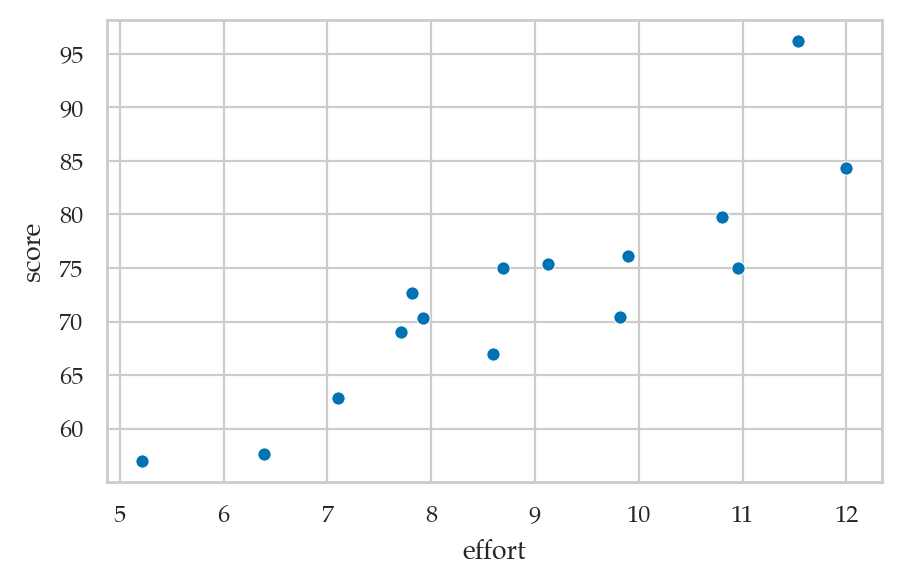

In [17]:
sns.scatterplot(x="effort", y="score", data=students);

#### Examples of nonlinear patterns

![Examples of scatter plots showing nonlinear patterns. ](./attachments/lm/scatter_plots_of_nonlinear_relationships.png)

### Residuals plots

In [18]:
scorehats = b0 + b1*efforts
residuals = scores - scorehats

#### Residuals versus the predicted values

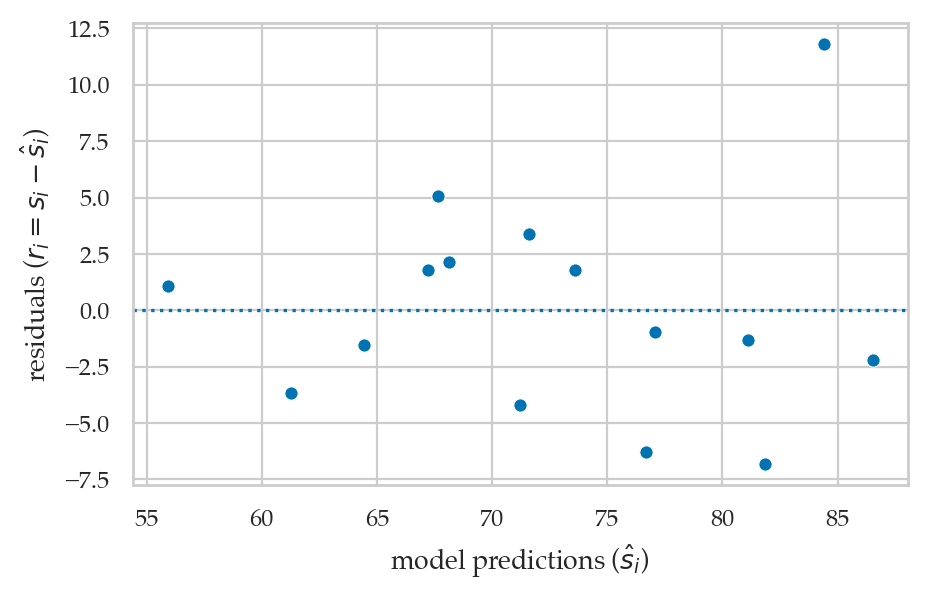

In [19]:
ax = sns.scatterplot(x=scorehats, y=residuals)
ax.set_xlabel("model predictions ($\\hat{s}_i$)")
ax.set_ylabel("residuals ($r_i = s_i - \\hat{s}_i$)")
ax.axhline(y=0, color="b", linestyle="dotted");

#### Residuals versus the predictor (bonus)

In [20]:
# ax = sns.scatterplot(x=efforts, y=residuals)
# ax.set_xticks(range(5,12+1))
# ax.set_ylabel("residuals ($r_i = s_i - \\hat{s}_i$)")
# ax.axhline(y=0, color="b", linestyle="dotted");

#### QQ-plot of the residuals

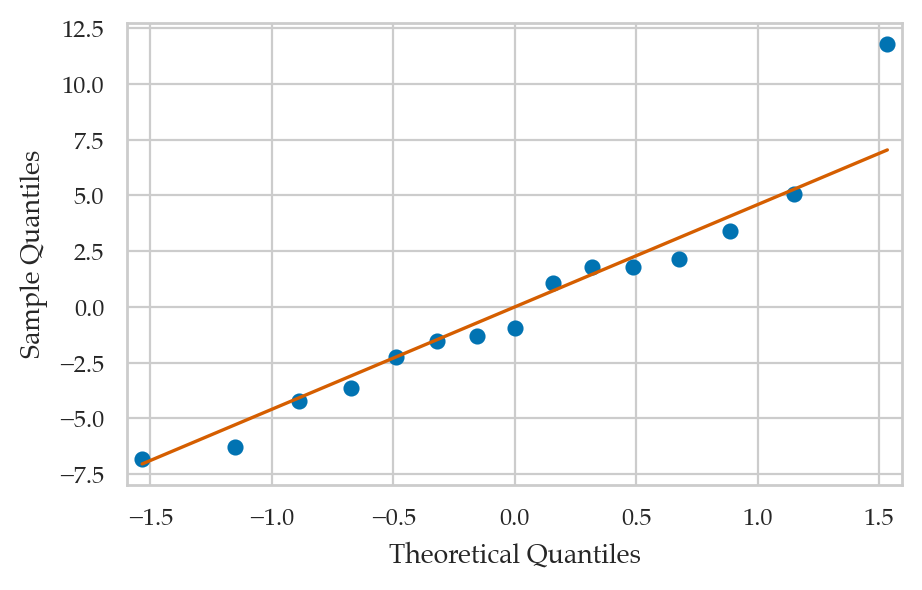

In [21]:
from statsmodels.graphics.api import qqplot

qqplot(residuals, line="s");

#### Residual plots that show violated assumptions

![Examples of residual plots showing violated modeling assumptions.](./attachments/lm/residuals_plots_with_violated_assumptions.png)

### Sum of squares quantities

#### Sum of squared residuals

In [22]:
SSR = np.sum( residuals**2 )
SSR

315.9122099692906

#### Explained sum of squares

In [23]:
meanscore = scores.mean()
ESS = np.sum( (scorehats-meanscore)**2 ) 
ESS

1078.2917900307098

#### Total sum of squares

In [24]:
TSS = np.sum( (scores - meanscore)**2 )
TSS

1394.2040000000002

In [25]:
SSR + ESS  # == TSS

1394.2040000000004

### Coefficient of determination $R^2$

In [26]:
R2 = ESS / TSS
R2

0.7734103402591799

## Using linear models to make predictions

In [27]:
def predict(x, b0, b1):
    yhat = b0 + b1*x
    return yhat

### Confidence interval for the mean

TODO: add formulas

### Confidence interval for observations

TODO: add formulas

### Example:predicting students' scores

Predict the `score` of a new student who invests 9 hours of `effort` per week.

In [28]:
neweffort = 9
scorehat = predict(neweffort, b0=32.5, b1=4.5)
scorehat

73.0

#### Confidence interval for the mean score

In [29]:
#######################################################
newdev = (neweffort - efforts.mean())**2
sum_dev2 = np.sum((efforts - efforts.mean())**2)
se_meanscore = sigmahat * np.sqrt(1/n + newdev/sum_dev2)
se_meanscore

1.2744485881877106

In [30]:
from scipy.stats import t as tdist
alpha = 0.1
t_l, t_u = tdist(df=n-2).ppf([alpha/2, 1-alpha/2])
[scorehat + t_l*se_meanscore, scorehat + t_u*se_meanscore]

[70.74303643371016, 75.25696356628984]

#### Prediction band for the mean score

![Plot of the 90\% confidence interval for the mean](./attachments/lm/prediction_mean_score_vs_effort.png)

#### Confidence interval for predicted scores

In [31]:
se_score = sigmahat * np.sqrt(1 + 1/n + newdev/sum_dev2)
se_score

5.0916754052414435

In [32]:
alpha = 0.1
t_l, t_u = tdist(df=n-2).ppf([alpha/2, 1-alpha/2])
[scorehat + t_l*se_score, scorehat + t_u*se_score]

[63.98298198333331, 82.0170180166667]

#### Prediction band for scores

![Plot of the 90\% confidence interval for the outcomes.](./attachments/lm/prediction_values_score_vs_effort.png)

### Prediction caveats

In [33]:
efforts.min(), efforts.max()

(5.21, 12.0)

It's not OK to extrapolate the validity of the model outside of the range of values where we have observed data.

For example, there is no reason to believe in the model's predictions about an `effort` of `20` hours per week:

In [34]:
predict(20, b0=32.5, b1=4.5)

122.5

Indeed, the model predicts the grade will be above 100\% which is impossible.

## Explanations

### Software for fitting linear models

- `scipy`
- `statsmodels`
- `scikit-learn`

### Fitting linear models with `statsmodels`

In [35]:
import statsmodels.formula.api as smf

lm1 = smf.ols("score ~ 1 + effort", data=students).fit()

In [36]:
type(lm1)

statsmodels.regression.linear_model.RegressionResultsWrapper

#### Estimated parameters for the model

In [37]:
lm1.params

Intercept    32.465809
effort        4.504850
dtype: float64

In [38]:
type(lm1.params)

pandas.core.series.Series

We often want to extract the intercept and slope parameters
for use in subsequent calculations.

In [39]:
b0 = lm1.params["Intercept"]  # = lm1.params[0]
b1 = lm1.params["effort"]     # = lm1.params[1]
b0, b1

(32.465809301599585, 4.504850344209077)

The estimate $\widehat{\sigma}$ is obtained by taking the square root of the `.scale` attribute.

In [40]:
sigmahat = np.sqrt(lm1.scale)
sigmahat

4.929598282660259

#### Model fitted values

In [41]:
lm1.fittedvalues  # == scorehats

0     81.838969
1     71.612959
2     71.207522
3     68.144224
4     77.063828
5     81.118193
6     67.648690
7     73.595093
8     55.936080
9     67.198205
10    76.703440
11    84.406734
12    64.450247
13    61.251803
14    86.524013
dtype: float64

#### Residuals

In [42]:
lm1.resid  # == scores - scorehats

0     -6.838969
1      3.387041
2     -4.207522
3      2.155776
4     -0.963828
5     -1.318193
6      5.051310
7      1.804907
8      1.063920
9      1.801795
10    -6.303440
11    11.793266
12    -1.550247
13    -3.651803
14    -2.224013
dtype: float64

#### Sum-of-squared quantities

In [43]:
# SSR     # ESS     # TSS              # R2
lm1.ssr,  lm1.ess,  lm1.centered_tss,  lm1.rsquared

(315.9122099692907, 1078.2917900307095, 1394.2040000000002, 0.7734103402591797)

#### Predictions

Predict the `score` of a new student who invests 9 hours of `effort` per week.

In [44]:
lm1.predict({"effort":9})

0    73.009462
dtype: float64

In [45]:
pred = lm1.get_prediction({"effort":9})
pred.se_mean, pred.conf_int(alpha=0.1)

(array([1.27444859]), array([[70.75249883, 75.26642597]]))

In [46]:
pred.se_obs, pred.conf_int(obs=True, alpha=0.1)

(array([5.09167541]), array([[63.99244438, 82.02648042]]))

#### Model summary table

In [47]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     44.37
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.56e-05
Time:                        09:13:57   Log-Likelihood:                -44.140
No. Observations:                  15   AIC:                             92.28
Df Residuals:                      13   BIC:                             93.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.4658      6.155      5.275      0.000      19.169      45.763
effort         4.5049      0.676      6.661      0.000       3.044       5.966
==============================================================================
Omnibus:                        4.062   Durbin-Watson:                   2.667
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                1.777
Skew:                           0.772   Prob(JB):                        0.411
Kurtosis:                       3.677   Cond. No.                         44.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Helper functions for plotting linear model results

- `plot_reg(lm)`: generate a regression plot for the model `lm`
- `plot_redid(lm)`: residuals plot for the model `lm`
- `plot_pred_bands(lm, ...)`: plot confidence intervals model `lm`.
  Use `ci_mean=True` to plot the predictions for the mean,
  or `ci_obs=True` to plot the predictions of the observations variable.


#### Regression plot

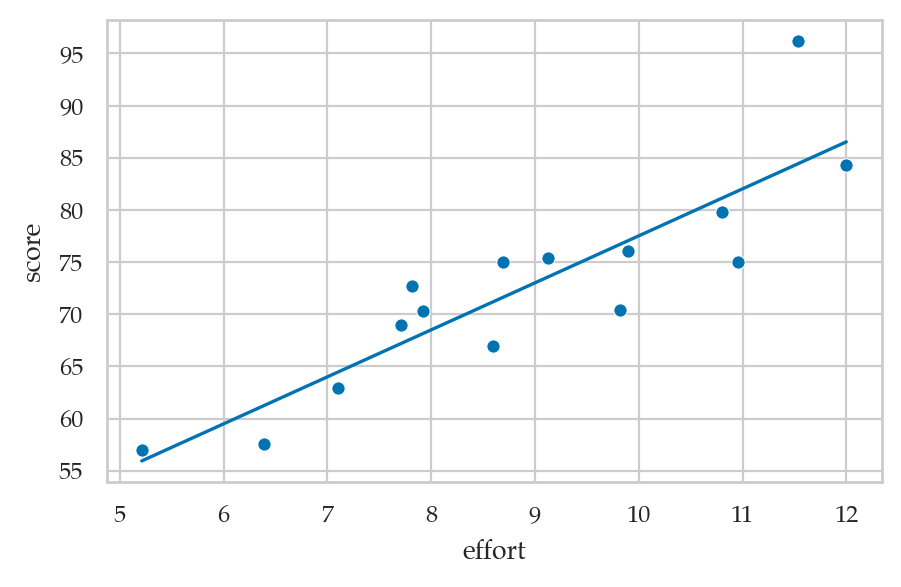

In [48]:
from ministats import plot_reg

plot_reg(lm1);

#### Residuals plot

In [49]:
xs = np.array([1,2,3])
hasattr(xs, "name")

False

In [50]:
xs = pd.Series([1,2,3])
hasattr(xs, "name") and xs.name is not None

False

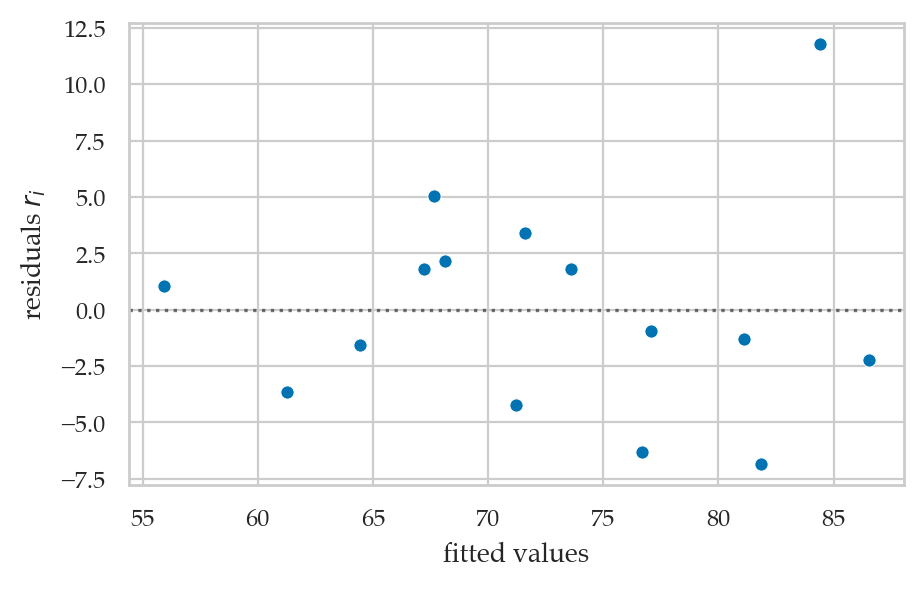

In [51]:
from ministats import plot_resid

plot_resid(lm1);

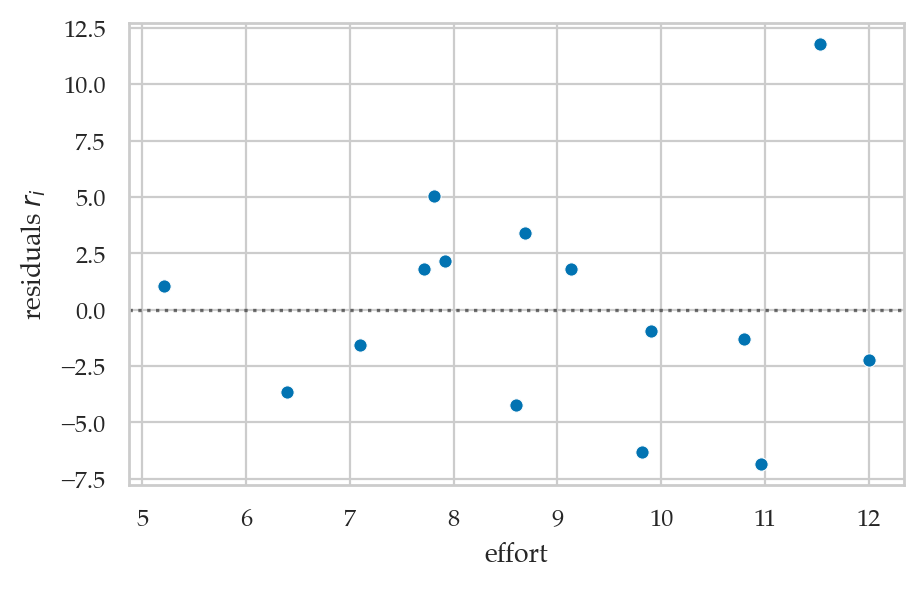

In [52]:
# BONUS plot residuals against predictor variable
plot_resid(lm1, pred="effort");

#### Prediction band plots

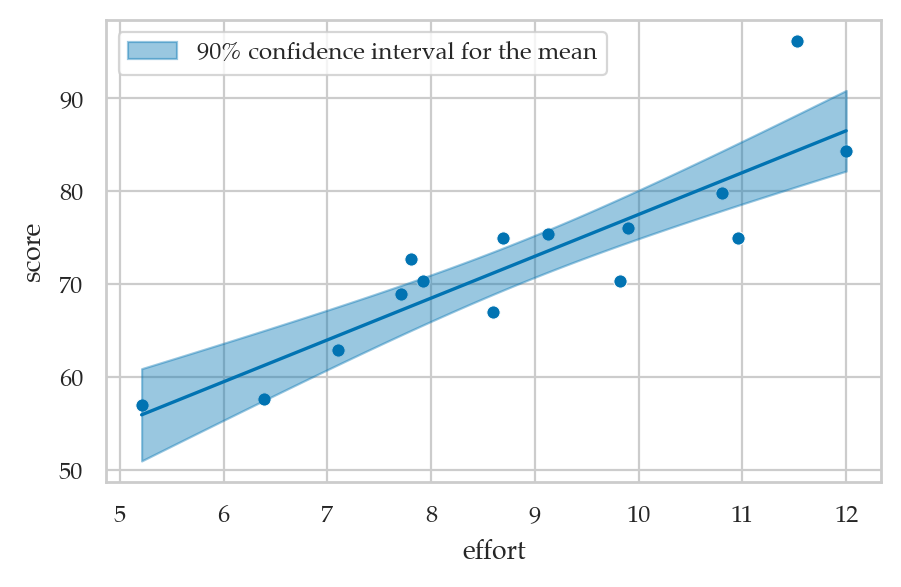

In [53]:
from ministats import plot_pred_bands

plot_reg(lm1)
plot_pred_bands(lm1, ci_mean=True, alpha_mean=0.1);

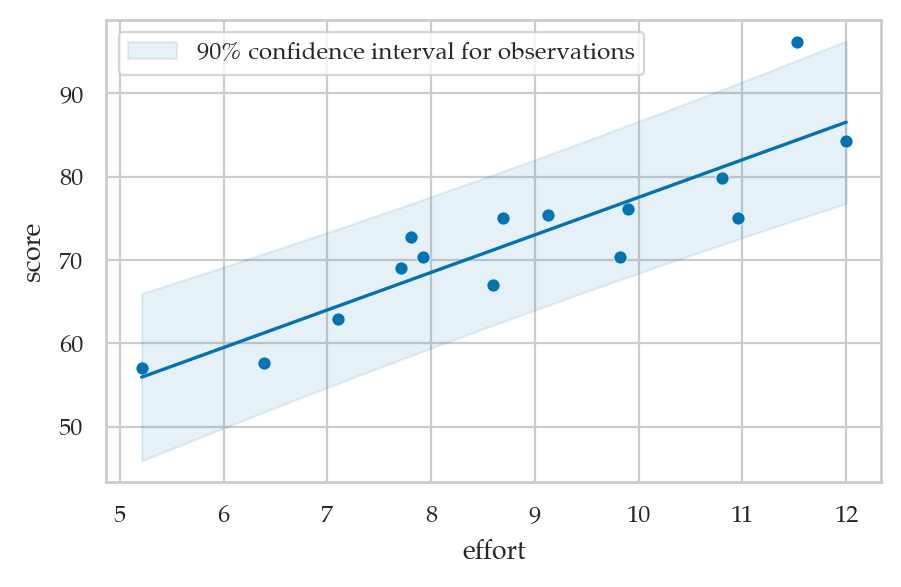

In [54]:
plot_reg(lm1)
plot_pred_bands(lm1, ci_obs=True, alpha_obs=0.1);

### Seaborn functions for plotting linear models

#### Regression plot

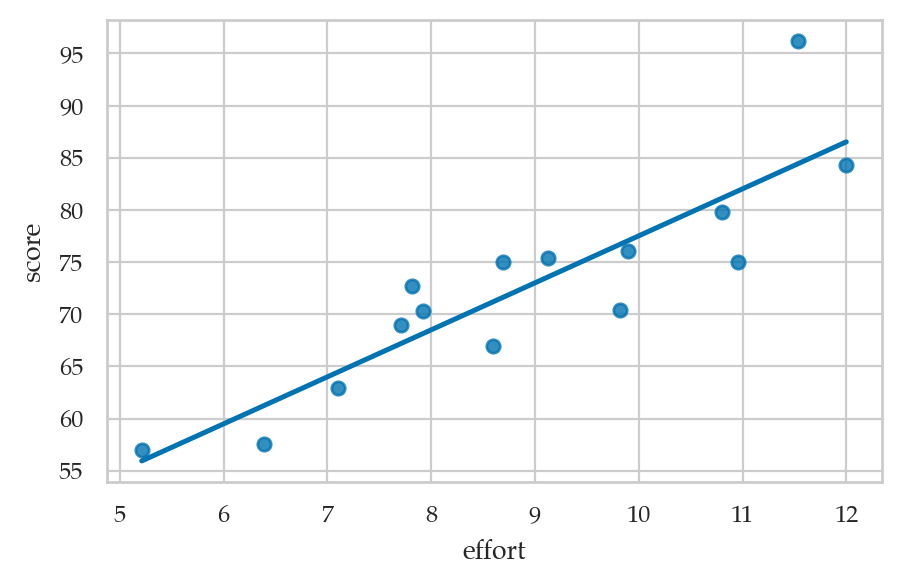

In [55]:
sns.regplot(x="effort", y="score", ci=None, data=students);

#### Residual plot

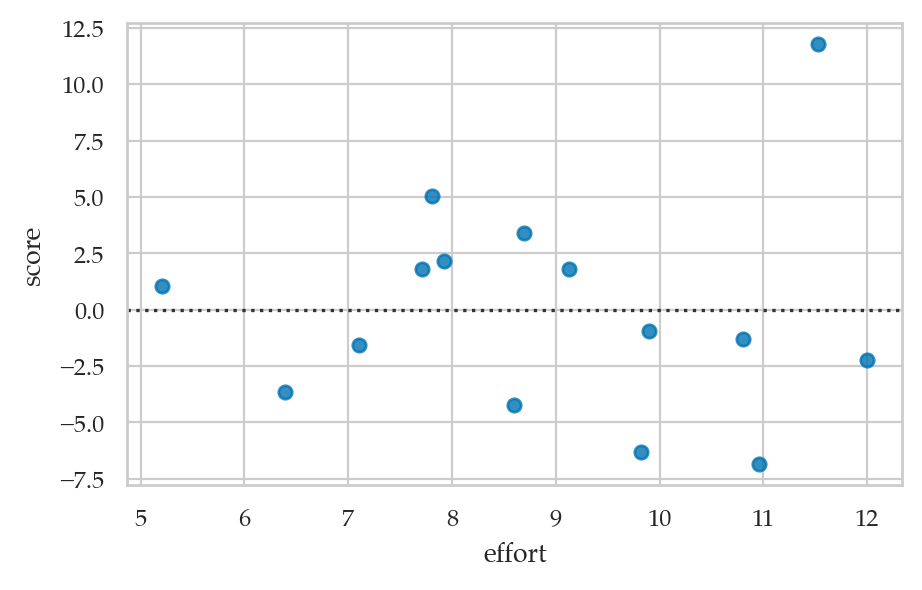

In [56]:
sns.residplot(x="effort", y="score", data=students);

### Pearson correlation coefficient revisited

#### Related to the Pearson correlation coefficient

In [57]:
efforts = students["effort"]
scores = students["score"]
pearson_r = efforts.corr(scores)
pearson_r

0.8794375135614695

In [58]:
# # ALT.
# from scipy.stats import pearsonr
# pearson_r = pearsonr(efforts, scores)[0]

In [59]:
pearson_r**2

0.7734103402591799

In [60]:
lm1 = smf.ols("score ~ 1 + effort", data=students).fit()
lm1.rsquared

0.7734103402591797

### Alternative methods for fitting linear models (optional)

#### Numerical optimization

In [61]:
from scipy.optimize import minimize

def ssr(betas):
    scorehats = betas[0] + betas[1]*efforts
    resids = scores - scorehats
    return np.sum(resids**2)

b0, b1 = minimize(ssr, x0=[0,0]).x
b0, b1

(32.465810240623306, 4.504850235444751)

#### Linear algebra

linear algebra solution using `numpy`


In [62]:
import numpy as np

# Prepare the design matrix
n = len(students)
X = np.ndarray((n,2))
X[:,0] = 1
X[:,1] = efforts
X

array([[ 1.  , 10.96],
       [ 1.  ,  8.69],
       [ 1.  ,  8.6 ],
       [ 1.  ,  7.92],
       [ 1.  ,  9.9 ],
       [ 1.  , 10.8 ],
       [ 1.  ,  7.81],
       [ 1.  ,  9.13],
       [ 1.  ,  5.21],
       [ 1.  ,  7.71],
       [ 1.  ,  9.82],
       [ 1.  , 11.53],
       [ 1.  ,  7.1 ],
       [ 1.  ,  6.39],
       [ 1.  , 12.  ]])

We obtain the least squares solution using the Moore–Penrose inverse formula:

$$
    \vec{\beta} = (X^{\sf T} X)^{-1}X^{\sf T}\; \mathbf{y}
$$

In [63]:
lares = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(scores)
b0, b1 = lares
b0, b1

(32.465809301599606, 4.504850344209073)

#### Fitting linear models using `scipy`

The helper function `scipy.stats.linregress` ...

In [64]:
from scipy.stats import linregress

scipyres = linregress(efforts, scores)
scipyres.intercept, scipyres.slope

(32.46580930159963, 4.504850344209071)

#### Fitting linear models using `scikit-learn`

The class `sklearn.linear_model.LinearRegression` allows us to fit linear models.

In [65]:
# %pip install scikit-learn

In [66]:
# from sklearn.linear_model import LinearRegression
# sklmodel = LinearRegression()
# sklmodel.fit(efforts.values[:,np.newaxis], scores)
# sklmodel.intercept_, sklmodel.coef_
# (32.46580930159961, array([4.50485034]))

#### Using the `statsmodels` low-level matrix API



In [67]:
import statsmodels.api as sm

X = sm.add_constant(efforts)
y = scores
smres = sm.OLS(y,X).fit()
smres.params["const"], smres.params["effort"]

(32.465809301599585, 4.504850344209077)

## Discussion

#### Maximum likelihood estimation


In [68]:
from scipy.optimize import minimize
from scipy.stats import norm

n = len(students)
efforts = students["effort"]
scores = students["score"]

def neg_log_likelihood(betas):
    scorehats = betas[0] + betas[1] * efforts
    residuals = scores - scorehats
    SSR = np.sum(residuals**2)
    sigmahat_MLE = np.sqrt(SSR/n)
    likelihoods = norm.pdf(residuals, scale=sigmahat_MLE)
    log_likelihood = np.sum(np.log(likelihoods))
    return -log_likelihood

b0, b1 = minimize(neg_log_likelihood, x0=[0,0]).x
b0, b1

(32.46578955243916, 4.504852455162375)

In [69]:
# calculate the maximum log-likelihood achieved
-neg_log_likelihood([b0, b1])

-44.13968417807846

In [70]:
# the same quantity reported by the model `lm1`
lm1.llf

-44.13968417807252

#### Examples of non-linear relationships

Hare are some examples of the different possible relationships between the `effort` and `score` variables.

![nonlinear relantionships](./attachments/lm/ELV_as_function_of_stats_hours.png)

## Exercises

### Exercise E??: marketing dataset

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')


<Axes: xlabel='youtube', ylabel='sales'>

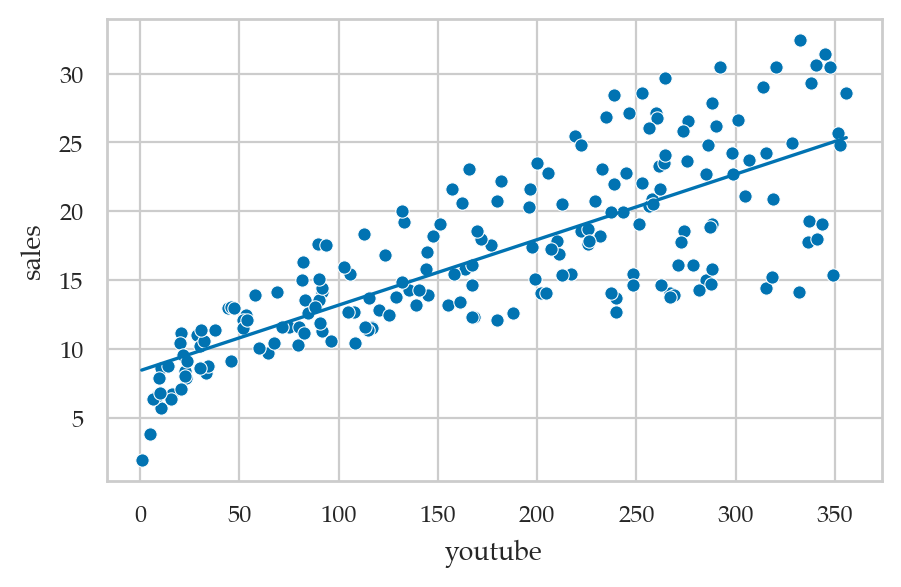

In [71]:
marketing = pd.read_csv("../datasets/exercises/marketing.csv")
print(marketing.columns)
lm_mkt = smf.ols("sales ~ 1 + youtube", data=marketing).fit()
plot_reg(lm_mkt)

<Axes: xlabel='fitted values', ylabel='residuals $r_i$'>

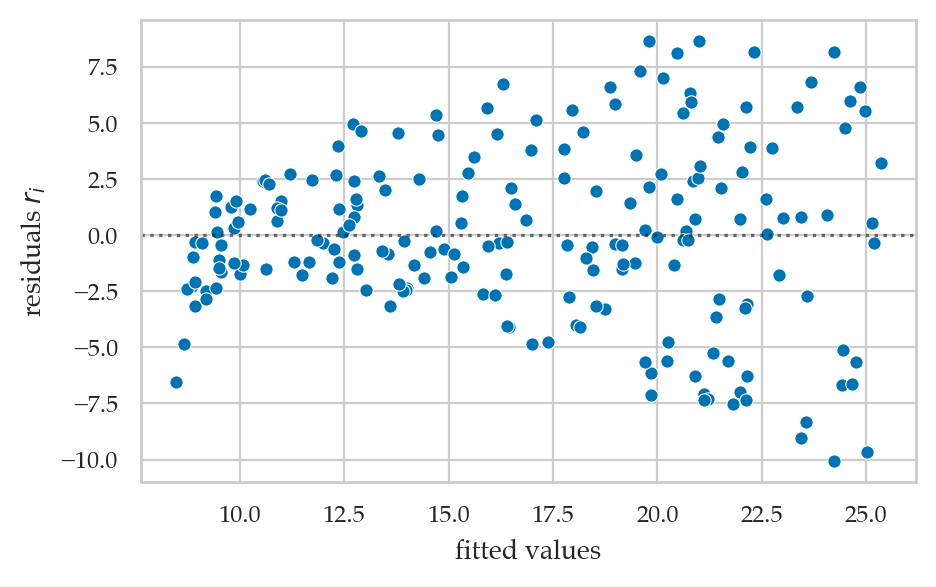

In [72]:
from ministats import plot_resid
plot_resid(lm_mkt)

## Links

### (BONUS MATERIAL) Formula for standard error of coefficients

In [73]:
lm1.bse

Intercept    6.155051
effort       0.676276
dtype: float64

Formula using summations

$$
    se(\beta_0) = \hat{\sigma} \cdot \sqrt{ \frac{1}{n} + \frac{\overline{x}^2}{\sum (x_i - \overline{x})^2}  }
    \qquad
    se(\beta_1) = \hat{\sigma} \cdot \sqrt{\frac{1}{\sum (x_i - \overline{x})^2}}
$$

TODO: show derivation why these formulas are equiv. to matrix formulas below when p=1

In [74]:
sum_dev2 = np.sum((efforts - efforts.mean())**2)
se_Intercept = sigmahat * np.sqrt(1/n + efforts.mean()**2/sum_dev2)
se_b_effort = sigmahat/np.sqrt(sum_dev2)
se_Intercept, se_b_effort

(6.155051380977696, 0.6762756464968056)

Alternative formula using design matrix

$$
    [se(\beta_0), se(\beta_1)]
    =
    \hat{\sigma} \cdot \text{diag}\left( \sqrt{ (X^T X)^{-1} } \right)
$$

where $X$ is the design matrix.

In [75]:
# construct the design matrix for the model 
X = sm.add_constant(students[["effort"]])
# calculate the diagonal of the inverse-covariance matrix
inv_covs = np.diag(np.linalg.inv(X.T.dot(X)))
np.sqrt(sigmahat**2 * inv_covs)

array([6.15505138, 0.67627565])

In [76]:
lm1.model.exog[:,1]

array([10.96,  8.69,  8.6 ,  7.92,  9.9 , 10.8 ,  7.81,  9.13,  5.21,
        7.71,  9.82, 11.53,  7.1 ,  6.39, 12.  ])